In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file
df = pd.read_csv('Adops & Data Scientist Sample Data - Q2 Regression.csv',header= None)
df.columns = ['A','B','C']

In [3]:
df.head(10)

,A,B,C
0,0.490,-0.180,11.50
1,-1.410,-1.230,11.80
2,0.943,4.510,-3.24
3,3.570,5.070,-23.90
4,-1.700,6.910,-22.10
5,-1.700,1.130,1.91
6,3.740,0.720,11.30
7,1.300,4.760,-4.92
8,-2.410,0.408,3.01
9,0.628,6.310,-8.66


In [4]:
#Data Preprocessing and analysis
#Checking for null values
df.isnull().values.any()

False

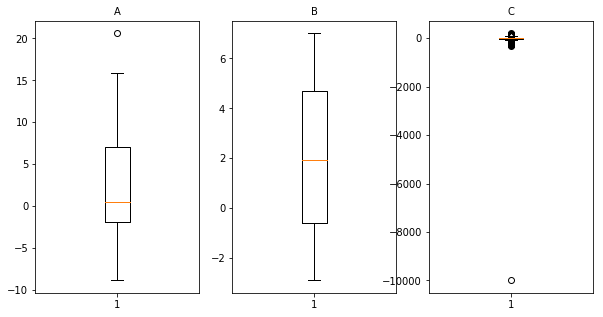

In [5]:
#Visualization to understand the data
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.boxplot(df.A)
plt.title('A',fontsize=10)
plt.subplot(1, 3, 2)
plt.boxplot(df.B)
plt.title('B',fontsize=10)
plt.subplot(1, 3, 3)
plt.boxplot(df.C)
plt.title('C',fontsize=10)
plt.show()

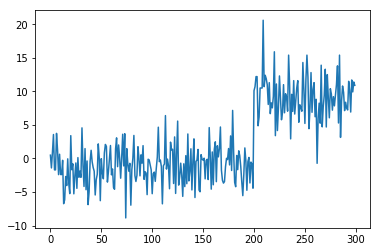

In [6]:
plt.plot(df.A)

There is one outlier in C column as shown in the above boxplot.

In [7]:
#removing the row containing the outlier.
df_clean = df[df.C != df.C.min()]

Text(0.5, 0, 'C')

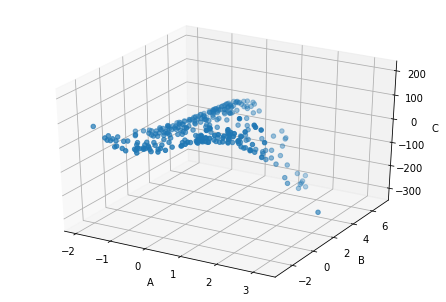

In [18]:
A = df_clean.A.values
B = df_clean.B.values
C = df_clean.C.values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A,B,C)
ax.set_xlabel('A', fontsize=10)
ax.set_ylabel('B', fontsize=10)
ax.set_zlabel('C', fontsize=10)

## Building Linear Regression model using Gradient descent

In [9]:
# Defining a cost function 
# The function will take 3 inputs; x: independent variable, y: dependent/target, b: coefficient
def costFunc(x,y,b):
    squared_residuals = np.power((x@b.T-y),2)
    sum_of_squares = np.sum(squared_residuals)
    n = len(x)
    C = sum_of_squares/(2*n)
    return C

# Returns C, the cost function which needs to be minimized in order to find the optimal coefficient (b).

In [10]:
# Formula for gradient descent
def gradDescent(x,y,b,n,a):
    init_cost = np.zeros(n) # initial costs are 0
    for i in range(n):
        b = b - (a/len(x)) * np.sum(x * (x @ b.T - y), axis = 0) # iteratively update beta
        init_cost[i] = costFunc(x, y, b) # update cost 
    return b, init_cost

In [11]:
x = df_clean.iloc[:,0:2] # Getting features
const = np.ones([x.shape[0],1]) # constant values
x = np.concatenate((const,x),axis=1) # combine constant with feature variables

y = df_clean.iloc[:,2:3].values # target variable
b = np.zeros([1,3]) # initialize b with 0

# set hyper_parameters
a = 0.02 # learning rate
n = 1000 # number of iterations

In [12]:
b, cost = gradDescent(x, y, b, n, a)
print(b)

[[ 25.73160746  -1.36669292 -15.22185856]]


Text(0, 0.5, 'Cost')

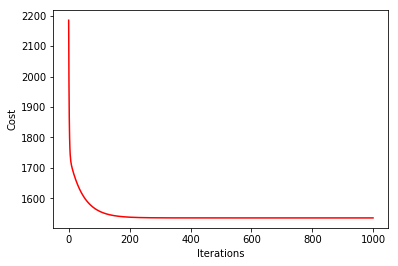

In [13]:
fig, ax = plt.subplots()
ax.plot(np.arange(n),cost, 'r')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')

In [14]:
# Defining Root mean squared error function
def rmse(y,y_prime):
    error = np.sqrt(sum((y - y_prime) ** 2) / len(y))
    return error.item()

In [15]:
def r_squared(y,y_prime):
    y_mean = np.mean(y)
    sst = sum((y - y_mean) ** 2)
    sse = sum((y - y_prime) ** 2)
    r2 = 1 - (sse / sst)
    return r2.item()

In [16]:
y_prime = x.dot(b.T) 
RMSE = rmse(y,y_prime)
print('RMSE is',RMSE)
r2 = r_squared(y,y_prime)
print('R2 score is',r2)

RMSE is 55.42728751404262
R2 score is 0.39402221019803685


## Model Improvisation

From the visual plots, feature A doesnt seem to show linear behavior. Hence, a ploynomial distribution by adding a quadratic term to the linear regression equation should improve the above scores.

In [19]:
x = df_clean.iloc[:,0:2] # Feature set
x['A'] = (x['A'] - x['A'].mean())/(x['A'].std()) # standardize to a common scale
x['A2'] = x['A']**2 # adding quadratic term
const = np.ones([x.shape[0],1]) 
x = np.concatenate((const,x),axis=1)

b = np.zeros([1,4])

In [20]:
b, cost = gradDescent(x, y, b, n, a)
print(b)

[[ 32.88917921  -2.38296209 -15.537266    -9.69866841]]


In [21]:
y_prime = x.dot(b.T) 
RMSE = rmse(y,y_prime)
print('RMSE is',RMSE)
r2 = r_squared(y,y_prime)
print('R2 score is',r2)

RMSE is 54.51364096769021
R2 score is 0.41383506571938666
